# Preprocessing amendments into json format 

https://zenodo.org/record/4709248#.YXesJS8itqs

According to paper: We extract data from official legislative documents in DOCX format
fetched online2
. We convert the original documents to HTML by
using the PyDocX3
library. We scrape the HTML documents in order
to extract structured data. We extract edits by using the difflib4
library. Finally, we map proposed edits to reported edits using the
edit distance as defined by difflib with a threshold of 0.9.
We identify conflicts between edits by casting this problem as
the Max-Cliques problem in the edit graph G defined in Section 4.
Although the Max-Clique problem is NP-complete, there exist algorithms for solving it efficiently. We use the Bron-Kerbosch algorithm
with pivot [19], which has worst-case time complexity of O(3
N /3
)
in the number of nodes of the connected component from which
we seek to extract cliques. This is efficient in practice, as the size of
the connected components in G is typically small. We successfully
identify approximately 100 000 conflicts in less than 20 minutes.


In [48]:
import pathlib 

root_data_dir= root_proj_dir = pathlib.Path("/data/AM")
doc_files = list(root_proj_dir.rglob("*_EN.docx"))


In [49]:
len(doc_files)

2343

## Take only documents from 9th legistlature

9th legislature voting was concluded in 26 May 2019, take any amendements after this date.

In [52]:
from docx import Document

def get_html(doc_file):
    doc = Document(doc_file)
    text_content = "\n".join([paragraph.text for paragraph in doc.paragraphs])
    soup = BeautifulSoup(text_content, 'html.parser')
    return soup

In [209]:
import re
def get_date(html):
    if html:
        pattern = r'\{([^}]+)\}' 
        matches = re.findall(pattern, html.text)
        if matches:
            extracted_date = matches[0]
            return extracted_date
        else:
            print("No date found.")
            return False
    else:
        return False
    
    

In [76]:
from datetime import datetime

leg9th_date = "26/05/2019"
leg9th_date = datetime.strptime(leg9th_date, '%d/%m/%Y')

In [77]:
from datetime import datetime
import pathlib
import shutil

def after_9th_leg(date):
    date = datetime.strptime(date, '%d/%m/%Y')
    if date > leg9th_date:
        return True
    else:
        return False
    
def save_9th_amendments(doc_files):
    target_dir = pathlib.Path("./data/")
    for doc_file in doc_files:
        doc_file = pathlib.Path(doc_file)
        doc = Document(doc_file)
        text_content = "\n".join([paragraph.text for paragraph in doc.paragraphs])
        soup = BeautifulSoup(text_content, 'html.parser')
        date = get_date(soup.date) 
        if date and after_9th_leg(date):
            # Save doc file and html file in data
            filename = doc_file.name
            new_dir = target_dir / filename
            shutil.copyfile(doc_file, new_dir)
            htlm_filename = filename.replace(".docx", ".html")
            with open(target_dir/htlm_filename, "w") as file:
                file.write(str(soup))
        elif not date:
            print("Date not found for file {doc_file}".format(doc_file=str(doc_file)))
            
            
        
        
    

Look for all the 9th plenary files and save them with this function call

In [78]:
save_9th_amendments(doc_files)

No date found.
Date not found for file /data/AM/econ/amendments/2022/703265/ECON_AM(2022)703265_EN.docx
No date found.
Date not found for file /data/AM/econ/amendments/2022/704541/ECON_AM(2022)704541_EN.docx
No date found.
Date not found for file /data/AM/econ/amendments/2022/703189/ECON_AM(2022)703189_EN.docx
No date found.
Date not found for file /data/AM/deve/amendments/2020/660080/DEVE_AM(2020)660080_EN.docx
Date not found for file /data/AM/agri/amendments/2018/622077/AGRI_AM(2018)622077_EN.docx


In [80]:
import pathlib 
data_path = pathlib.Path("./data/")
files = list(data_path.rglob("*_EN.docx"))
len(files)

1140

We have 1140 amendments to process. 

In [82]:
html_files = list(data_path.rglob("*.html"))
len(html_files)

1140

## Convert to html 

We already used a converted above but it fails to extract all the information, let's explore other ones here too.

In [118]:
from docx import Document
doc = Document("./data/AFCO_AM(2019)639934_EN.docx")


<table><tr><td><p>European Parliament</p><p>2019-2024</p></td><td><p></p></td></tr></table><p>&lt;Commission&gt;{AFCO}Committee on Constitutional Affairs&lt;/Commission&gt;</p><p>&lt;RefProc&gt;2019/2135&lt;/RefProc&gt;&lt;RefTypeProc&gt;(INI)&lt;/RefTypeProc&gt;</p><p>&lt;Date&gt;{18/11/2019}18.11.2019&lt;/Date&gt;</p><p>&lt;TypeAM&gt;AMENDMENTS&lt;/TypeAM&gt;</p><p>&lt;RangeAM&gt;1 - 45&lt;/RangeAM&gt;</p><p>&lt;TitreType&gt;Draft opinion&lt;/TitreType&gt;</p><p>&lt;Rapporteur&gt;Esteban González Pons&lt;/Rapporteur&gt;</p><p>&lt;DocRefPE&gt;(PE643.103v01-00)&lt;/DocRefPE&gt;</p><p>&lt;Titre&gt;on the implementation of the common security and defence policy – annual report 2018&lt;/Titre&gt;</p><p>&lt;DocRef&gt;(2019/2135(INI))&lt;/DocRef&gt;</p><p>AM_Com_NonLegOpinion</p><p>&lt;RepeatBlock-Amend&gt;<a id="restart"></a>&lt;Amend&gt;Amendment		&lt;NumAm&gt;1&lt;/NumAm&gt;</p><p>&lt;RepeatBlock-By&gt;&lt;Members&gt;Laura Huhtasaari&lt;/Members&gt;</p><p>&lt;/RepeatBlock-By&gt;</p><p>&l
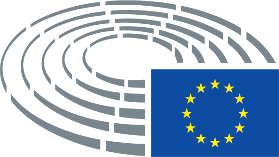

In [104]:
import mammoth
example_file = "./data/AFCO_AM(2019)643190_EN.docx"
with open(example_file, "rb") as docx_file:
    result = mammoth.convert_to_html(docx_file)
    html = result.value
    print(html)
        

In [135]:
doc = Document(example_file)
text_content = "\n".join([paragraph.text for paragraph in doc.paragraphs])
soup = BeautifulSoup(text_content, 'html')
text_content

'\n<Commission>{AFCO}Committee on Constitutional Affairs</Commission>\n\n<RefProc>2019/2135</RefProc><RefTypeProc>(INI)</RefTypeProc>\n<Date>{18/11/2019}18.11.2019</Date>\n<TypeAM>AMENDMENTS</TypeAM>\n<RangeAM>1 - 45</RangeAM>\n<TitreType>Draft opinion</TitreType>\n<Rapporteur>Esteban González Pons</Rapporteur>\n<DocRefPE>(PE643.103v01-00)</DocRefPE>\n<Titre>on the implementation of the common security and defence policy – annual report 2018</Titre>\n<DocRef>(2019/2135(INI))</DocRef>\n\nAM_Com_NonLegOpinion\n\n<RepeatBlock-Amend><Amend>Amendment\t\t<NumAm>1</NumAm>\n<RepeatBlock-By><Members>Laura Huhtasaari</Members>\n</RepeatBlock-By>\n<DocAmend>Draft opinion</DocAmend>\n<Article>Paragraph 1</Article>\nOr. <Original>{EN}en</Original>\n</Amend>\n<Amend>Amendment\t\t<NumAm>2</NumAm>\n<RepeatBlock-By><Members>Jorge Buxadé Villalba</Members>\n</RepeatBlock-By>\n<DocAmend>Draft opinion</DocAmend>\n<Article>Paragraph 1</Article>\nOr. <Original>{EN}en</Original>\n</Amend>\n<Amend>Amendment\t

In [136]:
doc.tables

In [131]:
doc = Document(example_file)


In [133]:
doc.sections

In [ ]:
content = "\n".join([paragraph.text for paragraph in doc.])

We can see that the information from the tables are missing because they are not part of the paragraphs. Try to find a way to retain tables as well.

In [117]:
doc.tables

In [112]:
len(doc.paragraphs)

341

In [119]:
import docx2txt

# Read the raw text content from DOCX
raw_text = docx2txt.process(example_file)


In [120]:
raw_text

"European Parliament\n\n2019-2024\n\n\n\n\n\n<Commission>{AFCO}Committee on Constitutional Affairs</Commission>\n\n\n\n<RefProc>2019/2135</RefProc><RefTypeProc>(INI)</RefTypeProc>\n\n<Date>{18/11/2019}18.11.2019</Date>\n\n<TypeAM>AMENDMENTS</TypeAM>\n\n<RangeAM>1 - 45</RangeAM>\n\n<TitreType>Draft opinion</TitreType>\n\n<Rapporteur>Esteban González Pons</Rapporteur>\n\n<DocRefPE>(PE643.103v01-00)</DocRefPE>\n\n<Titre>on the implementation of the common security and defence policy – annual report 2018</Titre>\n\n<DocRef>(2019/2135(INI))</DocRef>\n\n\t\nAM_Com_NonLegOpinion\n\n\n<RepeatBlock-Amend><Amend>Amendment\t\t<NumAm>1</NumAm>\n\n<RepeatBlock-By><Members>Laura Huhtasaari</Members>\n\n</RepeatBlock-By>\n\n<DocAmend>Draft opinion</DocAmend>\n\n<Article>Paragraph 1</Article>\n\n\n\nDraft opinion\n\nAmendment\n\n1.\tHighlights that in the current global security environment, an integral part of the EU’s strategic autonomy should be the independent capacity to guarantee the security of

In [130]:
print(len(doc.paragraphs))
print(doc.paragraphs[9].text)
print(len(doc.tables))


65
<DocRefPE>(PE639.807v01-00)</DocRefPE>
8


<table>
 <tr>
  <td>
   <p>
    European Parliament
   </p>
   <p>
    2019-2024
   </p>
  </td>
  <td>
   <p>
    
   </p>
  </td>
 </tr>
</table>
<p>
 &lt;Commission&gt;{AFCO}Committee on Constitutional Affairs&lt;/Commission&gt;
</p>
<p>
 &lt;RefProc&gt;2019/2135&lt;/RefProc&gt;&lt;RefTypeProc&gt;(INI)&lt;/RefTypeProc&gt;
</p>
<p>
 &lt;Date&gt;{18/11/2019}18.11.2019&lt;/Date&gt;
</p>
<p>
 &lt;TypeAM&gt;AMENDMENTS&lt;/TypeAM&gt;
</p>
<p>
 &lt;RangeAM&gt;1 - 45&lt;/RangeAM&gt;
</p>
<p>
 &lt;TitreType&gt;Draft opinion&lt;/TitreType&gt;
</p>
<p>
 &lt;Rapporteur&gt;Esteban González Pons&lt;/Rapporteur&gt;
</p>
<p>
 &lt;DocRefPE&gt;(PE643.103v01-00)&lt;/DocRefPE&gt;
</p>
<p>
 &lt;Titre&gt;on the implementation of the common security and defence policy – annual report 2018&lt;/Titre&gt;
</p>
<p>
 &lt;DocRef&gt;(2019/2135(INI))&lt;/DocRef&gt;
</p>
<p>
 AM_Com_NonLegOpinion
</p>
<p>
 &lt;RepeatBlock-Amend&gt;
 <a id="restart">
 </a>
 &lt;Amend&gt;Amendment		&lt;NumAm&gt;1&lt;/NumAm&gt;
</p>

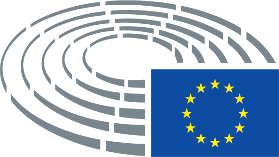

In [153]:
import mammoth
with open(example_file, "rb") as docx_file:
    result = mammoth.convert_to_html(docx_file)
    html = result.value
    soup_mammoth = BeautifulSoup(html, "html.parser")
    print(soup_mammoth.prettify())

In [193]:
from docx import Document
from docx.document import Document as _Document
from docx.oxml.text.paragraph import CT_P
from docx.oxml.table import CT_Tbl
from docx.table import _Cell, Table
from docx.text.paragraph import Paragraph
import html


# Takes as input the path of the html file. 
def get_html(file):
    def iter_block_items(parent):
        """
        Generate a reference to each paragraph and table child within *parent*,
        in document order. Each returned value is an instance of either Table or
        Paragraph. *parent* would most commonly be a reference to a main
        Document object, but also works for a _Cell object, which itself can
        contain paragraphs and tables.
        """
        if isinstance(parent, _Document):
            parent_elm = parent.element.body
        elif isinstance(parent, _Cell):
            parent_elm = parent._tc
        elif isinstance(parent, _Row):
            parent_elm = parent._tr
        else:
            raise ValueError("something's not right")
        for child in parent_elm.iterchildren():
            if isinstance(child, CT_P):
                yield Paragraph(child, parent)
            elif isinstance(child, CT_Tbl):
                yield Table(child, parent)

    document = Document(file)

    html_string = ""
    for block in iter_block_items(document):
        #print(block.text if isinstance(block, Paragraph) else '<table>')
        if isinstance(block, Paragraph):
            if block.text:
                html_string += block.text + "<br>"
        elif isinstance(block, Table):
            html_string += "<table>"
            for row in block.rows:
                if any(cell.text.strip() for cell in row.cells):  # Check if any cell in the row is non-empty
                    html_string += "<tr>"
                    row_data = []
                    for cell in row.cells:
                        cell_text = " ".join([paragraph.text for paragraph in cell.paragraphs])
                        html_string += f"<td>{cell_text}</td>"
                    html_string += "</tr>"
                    
            html_string += "</table>"

    soup = BeautifulSoup(html_string, "html.parser")
    return soup

In [178]:
amendments = soup.find_all("amend")

In [179]:
amendments

[<amend>Amendment		<numam>1</numam><br/><repeatblock-by><members>Laura Huhtasaari</members><br/></repeatblock-by><br/><docamend>Draft opinion</docamend><br/><article>Paragraph 1</article><br/><table><tr><td>Draft opinion</td><td>Amendment</td></tr><tr><td>1.	Highlights that in the current global security environment, an integral part of the EU’s strategic autonomy should be the independent capacity to guarantee the security of its own citizens;</td><td>1.	Highlights that in the current global security environment, the Member States remain the main guarantors of the security of their own citizens;</td></tr></table>Or. <original>{EN}en</original><br/></amend>,
 <amend>Amendment		<numam>2</numam><br/><repeatblock-by><members>Jorge Buxadé Villalba</members><br/></repeatblock-by><br/><docamend>Draft opinion</docamend><br/><article>Paragraph 1</article><br/><table><tr><td>Draft opinion</td><td>Amendment</td></tr><tr><td>1.	Highlights that in the current global security environment, an integr

In [186]:
amendments = soup.find_all("amend")

for amend in amendments:
    numam = amend.find("numam").text.strip()
    members = amend.find("members").text.strip()
    table = amend.find_all("table")[0]
    draft_opinion = table.find_all("tr")[1].find_all("td")[0].text.strip()
    amendment = table.find_all("tr")[1].find_all("td")[1].text.strip()

    print(f"Amendment {numam}:")
    print(f"Authors: {members}\n")
    print(f"Draft Opinion: {draft_opinion}\n")
    print(f"Final amendment: {amendment}")
    print("-------------------")

Amendment 1:
Authors: Laura Huhtasaari

Draft Opinion: 1.	Highlights that in the current global security environment, an integral part of the EU’s strategic autonomy should be the independent capacity to guarantee the security of its own citizens;

Final amendment: 1.	Highlights that in the current global security environment, the Member States remain the main guarantors of the security of their own citizens;
-------------------
Amendment 2:
Authors: Jorge Buxadé Villalba

Draft Opinion: 1.	Highlights that in the current global security environment, an integral part of the EU’s strategic autonomy should be the independent capacity to guarantee the security of its own citizens;

Final amendment: 1.	Highlights that in the current global security environment, EU’s Member States should be able to voluntarily cooperate to guarantee the security of its own citizens;
-------------------
Amendment 3:
Authors: Charles Goerens

Draft Opinion: 1.	Highlights that in the current global security env

In [219]:
import difflib
import json

# Takes as input the path of the html file. 
def get_html(file):
    def iter_block_items(parent):
        """
        Generate a reference to each paragraph and table child within *parent*,
        in document order. Each returned value is an instance of either Table or
        Paragraph. *parent* would most commonly be a reference to a main
        Document object, but also works for a _Cell object, which itself can
        contain paragraphs and tables.
        """
        if isinstance(parent, _Document):
            parent_elm = parent.element.body
        elif isinstance(parent, _Cell):
            parent_elm = parent._tc
        elif isinstance(parent, _Row):
            parent_elm = parent._tr
        else:
            raise ValueError("something's not right")
        for child in parent_elm.iterchildren():
            if isinstance(child, CT_P):
                yield Paragraph(child, parent)
            elif isinstance(child, CT_Tbl):
                yield Table(child, parent)

    document = Document(file)

    html_string = ""
    for block in iter_block_items(document):
        #print(block.text if isinstance(block, Paragraph) else '<table>')
        if isinstance(block, Paragraph):
            if block.text:
                html_string += block.text + "<br>"
        elif isinstance(block, Table):
            html_string += "<table>"
            for row in block.rows:
                if any(cell.text.strip() for cell in row.cells):  # Check if any cell in the row is non-empty
                    html_string += "<tr>"
                    row_data = []
                    for cell in row.cells:
                        cell_text = " ".join([paragraph.text for paragraph in cell.paragraphs])
                        html_string += f"<td>{cell_text}</td>"
                    html_string += "</tr>"
                    
            html_string += "</table>"

    soup = BeautifulSoup(html_string, "html.parser")
    return soup


# Takes as input the path of the docx file. 
def get_json(file):
    
    #Load the mep json file
    with open('meps.json') as f:
        mep_info = json.load(f)
    
    #Transform docx file into html (soup)
    soup = get_html(file)
    
    
    #Look for the amendments
    amendments = soup.find_all("amend")

    results = []

    #Get relevant information from the HTML
    parliament = soup.find("td").text.strip()
    committee_full = soup.find("commission").text.strip().replace("Committee on ", "")
    committee = committee_full[committee_full.find("{")+1 : committee_full.find("}")]
    dossier_ref = soup.find("refproc").text.strip()
    date_full = soup.find("date").text.strip().strip("{}")
    date = date_full.split('}')[0].strip()
    rapporteur = soup.find("rapporteur").text.strip()
    source = soup.find("docref").text.strip()
    dossier_title = soup.find("titre").text.strip()

    for amend in amendments:
        #Get amendment number
        amendment_num = amend.find("numam").text.strip()

        #Get authors (in members) of json
        author_names= [author.text.strip() for author in amend.find_all("members")]
        authors = []
        for author_name in author_names:
            author_data = None
            for mep_id, mep_data in mep_info.items():
                if mep_data.get('name').lower() == author_name.lower():
                    author_data = mep_data
                    break
            if author_data:
                author = {
                'id': int(mep_id),
                'name': author_data.get('name'),
                'gender': author_data.get('gender'),
                'nationality': author_data.get('nationality'),
                'group': author_data.get('group-ep9'),
                'rapporteur': False
                }
                authors.append(author)
                
        

        #Get the draft opinion and final amendment
        table = amend.find("table")
        draft_opinion = table.find_all("tr")[1].find_all("td")[0].text.strip()
        amendment = table.find_all("tr")[1].find_all("td")[1].text.strip()

        #We get here the edit_indices and edit type using difflib
        diff = difflib.ndiff(draft_opinion.split(), amendment.split())
        edit_type = None
        diff_indices = {'i1': 0, 'i2': 0, 'j1': 0, 'j2': 0}

        for i, line in enumerate(diff):
            if line.startswith('-'):
                edit_type = 'delete'
                diff_indices['i1'] = i
                diff_indices['i2'] = i + 1
                diff_indices['j1'] = i
                diff_indices['j2'] = i
                break
            elif line.startswith('+'):
                edit_type = 'insert'
                diff_indices['i1'] = i
                diff_indices['i2'] = i
                diff_indices['j1'] = i
                diff_indices['j2'] = i + 1
                break
            elif line.startswith('?'):
                edit_type = 'replace'
                diff_indices['i1'] = i
                diff_indices['i2'] = i + 1
                diff_indices['j1'] = i
                diff_indices['j2'] = i + 1
                break

        #Create the final json.
        amendment_data = {
            'edit_id': int(amendment_num),
            'edit_type': edit_type,
            'accepted': True,
            'dossier_ref': dossier_ref,
            'dossier_type': 'opinion',
            'date': date,
            'legal_act': 'regulation',
            'committee': committee,
            'outsider': False,
            'article_type': 'recital',
            'source': source,
            'justification': None,
            'edit_indices': diff_indices,
            'text_original': [draft_opinion],
            'text_amended': [amendment],
            'authors': authors,
            'parliament': parliament,
            'rapporteur': rapporteur,
            'dossier_title': dossier_title
        }

        results.append(amendment_data)

    # Convert results to JSON
    json_data = json.dumps(results,  indent=None, separators=(',', ':'))
    return json_data

In [220]:
example_file

'./data/AFCO_AM(2019)643190_EN.docx'

In [221]:
get_json(example_file)

'[{"edit_id":1,"edit_type":"delete","accepted":true,"dossier_ref":"2019/2135","dossier_type":"opinion","date":"18/11/2019","legal_act":"regulation","committee":"AFCO","outsider":false,"article_type":"recital","source":"(2019/2135(INI))","justification":null,"edit_indices":{"i1":9,"i2":10,"j1":9,"j2":9},"text_original":["1.\\tHighlights that in the current global security environment, an integral part of the EU\\u2019s strategic autonomy should be the independent capacity to guarantee the security of its own citizens;"],"text_amended":["1.\\tHighlights that in the current global security environment, the Member States remain the main guarantors of the security of their own citizens;"],"authors":[],"parliament":"European Parliament 2019-2024","rapporteur":"Esteban Gonz\\u00e1lez Pons","dossier_title":"on the implementation of the common security and defence policy \\u2013 annual report 2018"},{"edit_id":2,"edit_type":"delete","accepted":true,"dossier_ref":"2019/2135","dossier_type":"opin